https://www.kaggle.com/arjunbhasin2013/ccdata

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
%matplotlib inline

In [65]:
df = pd.read_csv('/home/hadoop/SCProjects/0_SCProjects_github.com_SCelisV/python/SC.Code/jupyter/MPML/data/bank/CC/CCGENERAL.csv')

- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

## Preparando los datos

In [66]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [67]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [68]:
# busca los vacios,los ordena y muestra las primeras columnas
df.isnull().sum().sort_values(ascending=False).head(3)

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
TENURE                0
dtype: int64

In [69]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [70]:
#eliminamos la columna para anonimizar los datos
df = df.drop('CUST_ID', axis = 1)

In [71]:
#convierte todos los datos en float (trabajar con el mismo tipos)
df = df.astype(np.float64)
#informa los elementos NA datos vacios en este caso ffill => rellena con el previo de esa misma columna
df = df.fillna(method ='ffill') 

In [72]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
dtype: object

In [73]:
# busca los vacios,los ordena y muestra las primeras columnas
df.isnull().sum().sort_values(ascending=False).head(3)

TENURE                        0
ONEOFF_PURCHASES_FREQUENCY    0
BALANCE_FREQUENCY             0
dtype: int64

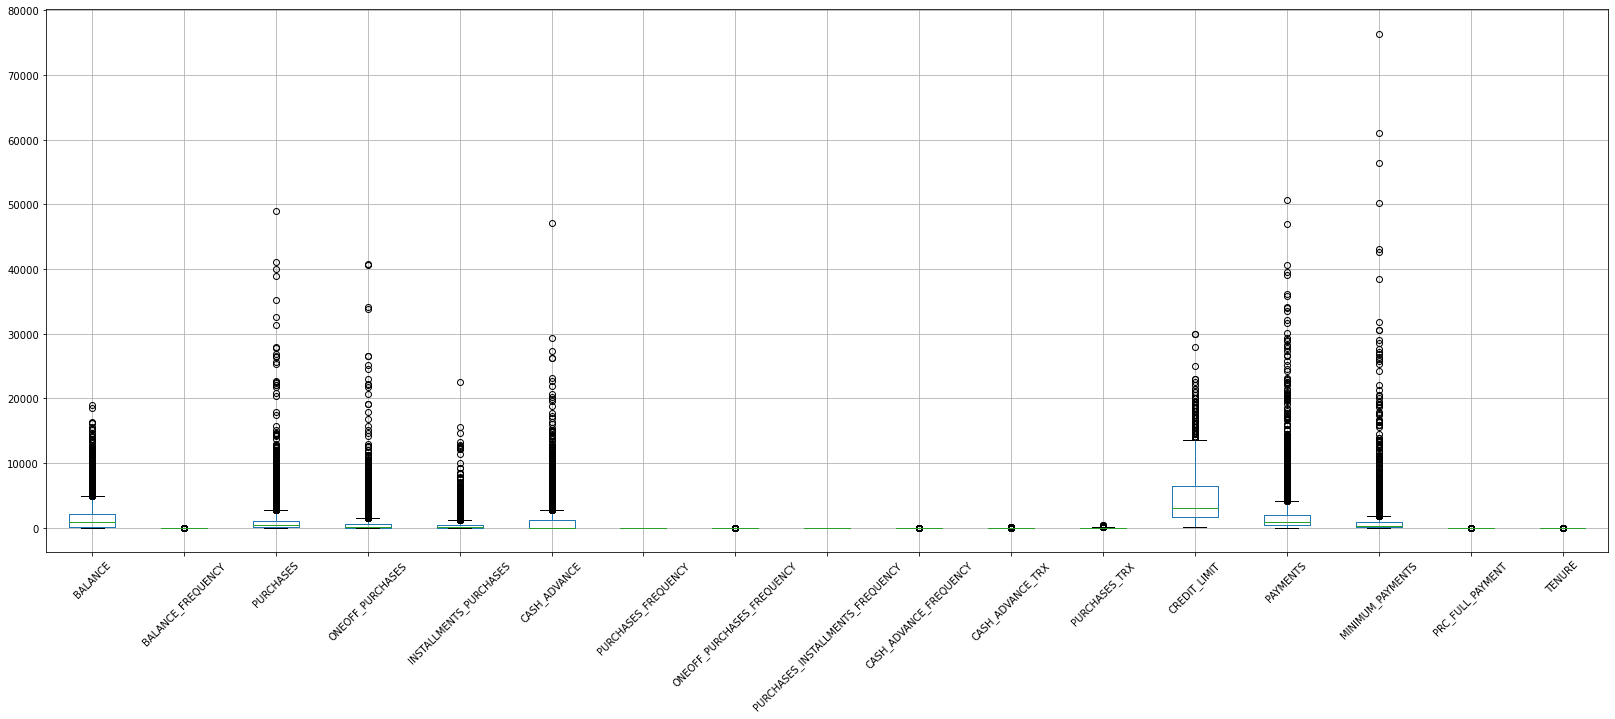

In [74]:
# para tener una idea de los datos
df.boxplot(figsize=(28,10))
plt.xticks(rotation=45);

In [75]:
#todos los datos tienen una escala diferente, sí graficamos esto no es representativo

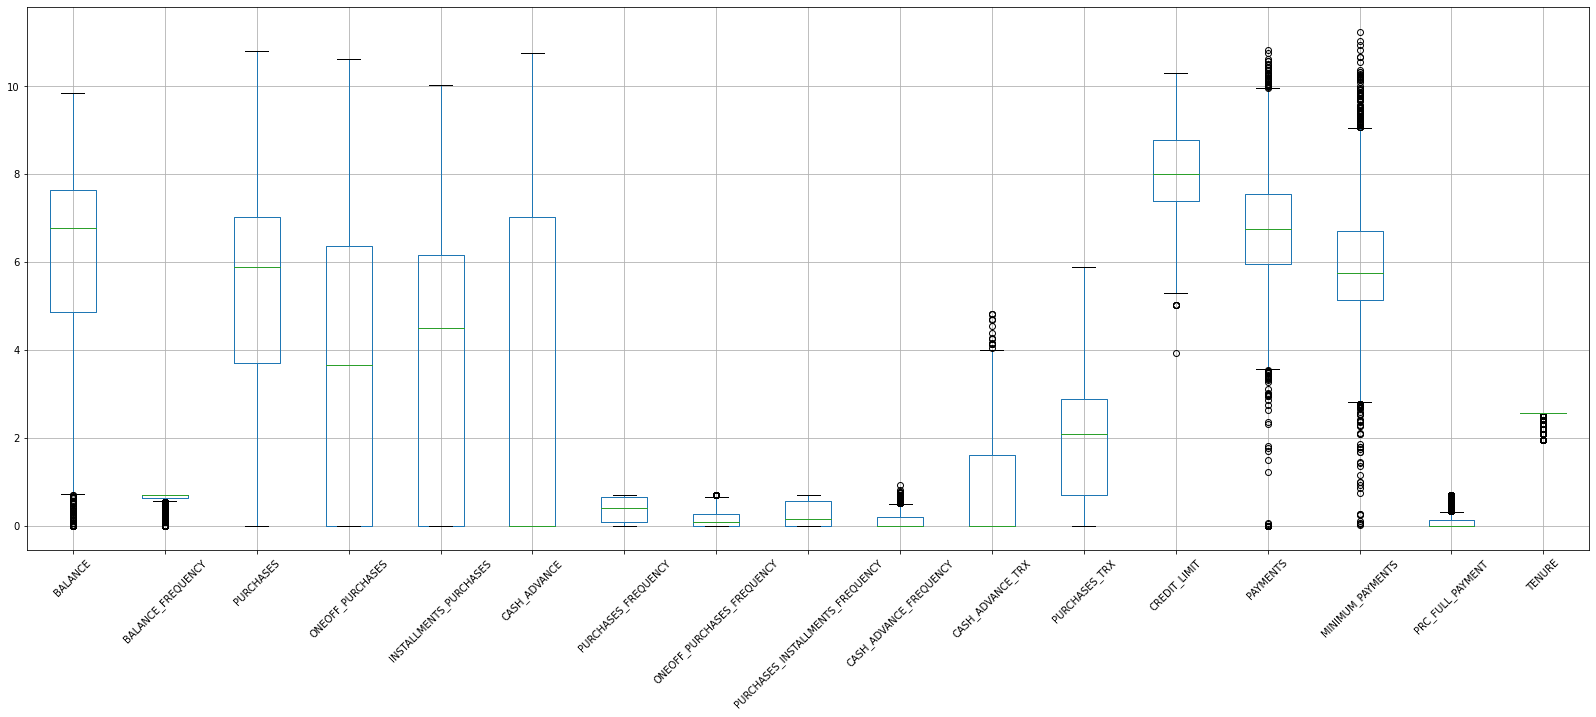

In [76]:
# Graficar con escala logaritmica  (todo dentro de la misma escala), para mejor visualizacion - log0 no esta definido..por eso usamos (1+df) de esta forma no dará un error matemático y podrá hacer la gráfica, obtenemos valores de 0 a 10, eso nos permite ver mejor los datos.
np.log(1+df).boxplot(figsize=(28,10))
plt.xticks(rotation=45);

In [77]:
from sklearn.preprocessing import StandardScaler,normalize
# Standardize data, para este algoritmo usando una escalar de -1 a 1.
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) # realizamos una transformación al data frame.
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=df.columns) 

In [78]:
# tiene valores entre -1 y 1 que representa nuestros datos 
normalized_df.head() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


## Clustering

<p style='text-align: justify;'>El <b>clustering</b> ó "agrupaciones", es una técnica que busca identificar de manera automática diferentes agrupaciones (clústeres) de elementos dependiendo de la similitud que exista entre ellos. El objetivo fundamental de las técnicas de clustering es la de identificar diversos grupos donde la similitud entre los miembros del mismo grupo sea alta y la similitud con los miembros de otros grupos sea baja.</p> 
<center><img src="img/Clustering.png" width = "60%"></center>

<p style='text-align: justify;'>Existen múltiples algoritmos de clustering, pero a continuación se presenta un esquema donde se observan cuatro tipos de algoritmos de clustering diferentes.</p> 
<center><img src="img/Algoritmos.png" width = "80%"></center>

https://developers.google.com/machine-learning/clustering/clustering-algorithms

## K-Means

<p style='text-align: justify;'>El algoritmo de <b>K-Means</b> es un algoritmo de Clustering basado en <b> Centroides </b> que agrupa diversos elementos en k grupos (párametro para definir la cantidad de grupos) basándose en la similitud de las características de los elementos. El agrupamiento se realiza a través de un proceso iterativo (repetición de pasos, se define una cantidad de iteraciones..), donde en cada una de sus repeticiones se pretende minimizar la suma del cuadrado de las distancias entre cada uno de los objetos y el centroide de su grupo o clúster. El algoritmo consta de tres pasos:</p>

1) Asignación inicial de los centroides. (tantos como k grupos definidos, de forma arbitraria)

2) Creación de los conjuntos tomando en cuenta que elementos están más cerca a cada centroide.

3) Actualización de los centroides, si fuese necesario

<p style='text-align: justify;'>Los pasos 2 y 3 se repetirán hasta que los centroides no se muevan o que se muevan debajo de un umbral definido por el investigador. Incluso es posible parar el procedimiento definiendo desde el principio un número máximo de repeticiones.</p>

<p style='text-align: justify;'>En el siguiente ejemplo se observa un conjunto de puntos distribuidos, el algoritmo de K-Means buscará generar diferentes conjuntos de puntos, basándose en el posicionamiento de centroides.</p>
<center><img src="img/kmeans1.png" width = "60%"></center>
<p style='text-align: justify;'>Utilizaremos <b>cuatro centroides</b> diferentes para separar el conjunto de datos en cuatro grupos diferentes, los centroides están indicados en la figura como puntos verdes más grandes que los puntos que intentamos clasificar y los grupos se indicarán coloreando los puntos que pertenecerán a cada conjunto. Al principio los cuatro centroides se posicionarán de forma arbitraria.</p>
<center><img src="img/kmeans2.png" width = "60%"></center>
<p style='text-align: justify;'>El algoritmo K-Means es un algoritmo iterativo donde en cada una de las repeticiones que realice se intentará posicionar de la forma más eficiente cada uno de los centroides, de tal forma que agrupen mejor los puntos.</p>
<center><img src="img/kmeans3.png" width = "60%"></center>
<p style='text-align: justify;'>Posterior al movimiento se vuelven a definir cada uno de los grupos, en la imagen se observa que algunos puntos cambiaron su color.</p>
<center><img src="img/kmeans4.png" width = "60%"></center>
<p style='text-align: justify;'>El proceso continua y se vuelven a posicionar los centroides.</p>
<center><img src="img/kmeans5.png" width = "60%"></center>
<p style='text-align: justify;'>Los conjuntos se vuelven a actualizar.</p>
<center><img src="img/kmeans6.png" width = "60%"></center>
<p style='text-align: justify;'>El algoritmo continua hasta que se cumpla la condición de paro.</p>

## Usando K-Means

In [79]:
from sklearn.cluster import KMeans

In [80]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters)
km.fit(normalized_df);

In [81]:
# este método lo que hace es resumir las 17 variables del df en 2 para poder gráficar en el plano
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 

In [82]:
# realizamos la transformación del conjunto de datos normalizado .. xq hace la transformación -O-J-O- ? 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330634,0.268881
3,-0.481657,-0.097612
4,-0.563512,-0.482505


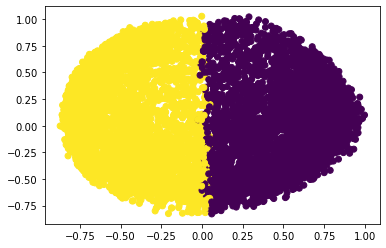

In [83]:
# Todo el conjunto de puntos de las 17 variables comprimidas en 2
plt.scatter(X_principal['P1'], X_principal['P2'], c = km.predict(normalized_df));

## Elbow method ó método del codo.. ? para decidir cuantos cluster vamos a utilizar

In [84]:
# Cual es la suma de distancias para cada conjunto con k clusters hasta 15
# el objetivo es minimizar la suma de distancias al cuadrado, entre los clusters
Sum_of_squared_distances = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_df)
    Sum_of_squared_distances.append(km.inertia_)

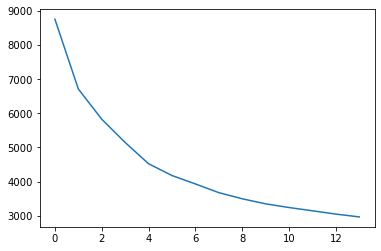

In [85]:
# al graficar estas distancias, vemos que 
# con 1 cluster la suma de distancias esta cerca a 9000 ..
# con 2 cluster la suma de distancias esta cerca a 5600 ..
# con 4 cluster la suma de distancias esta cerca a 4000 ..
# vemos que el punto óptimo de cluster es cuando empieza a disminuir la distancia más rápidamente, esta entre el 4 y el 6, 
# dicen que este método es un poco ambiguo, y subjetivo ya que esta disminución es determinada "visualmente.."
plt.plot(Sum_of_squared_distances);

Es ambiguo pero podemos determinar que el optimo es de 4 a 6 clusters; al agregar mas clusters no se obtendra ganancia significativa

## Silhouette method ó silueta ... ¿Cómo funciona?

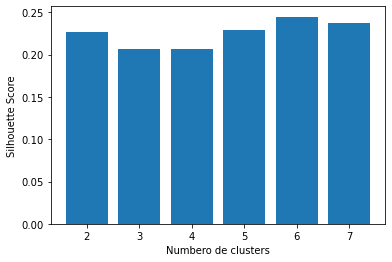

In [86]:
# es una métrica que se intenta minimizar el score, de tal forma que el mejor resultado es el más bajo 
from sklearn.metrics import silhouette_score
silhouette_scores = [] 
# para diferentes cluster calcular este score..
for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normalized_df, KMeans(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = range(2,8)
plt.bar(k, silhouette_scores) 
plt.xlabel('Numbero de clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

El valor mínimo para este método el optimo es de 3 a 4 clusters.

Decidimos entre estos dos métodos utilizar 4 clusters

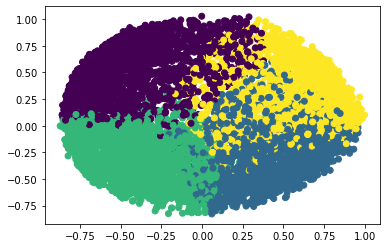

In [87]:
# para los 4 centroides, utilizamos los datos normalizados y hacemos un scatter para ver los conjuntos(adaptados a dos dimensiones)
n_clusters = 4
km = KMeans(n_clusters=n_clusters)
km.fit(normalized_df);
plt.scatter(X_principal['P1'], X_principal['P2'], c = km.predict(normalized_df));

In [88]:
#Agregamos la etiqueta del cluster correspondiente y definimos una nueva columna en el dataFrame original para identificar a que cluster pertenece cada elemento
df["c"] = km.predict(normalized_df)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,c
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,627.284787,0.000000,12.0,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,2


Hasta ahora lo único que hemos hecho es separar los datos en clusters, lo que haremos será gráficar los datos con respecto a cada uno de los clusters

In [89]:
import seaborn as sns

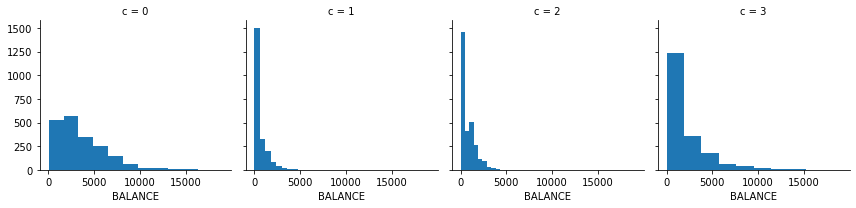

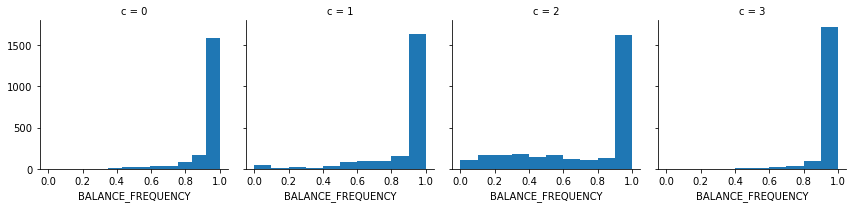

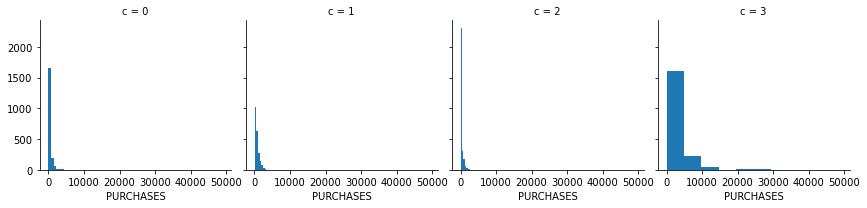

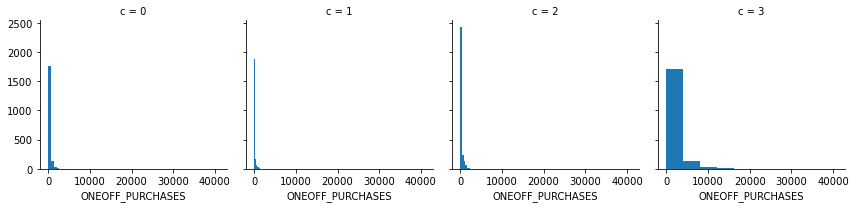

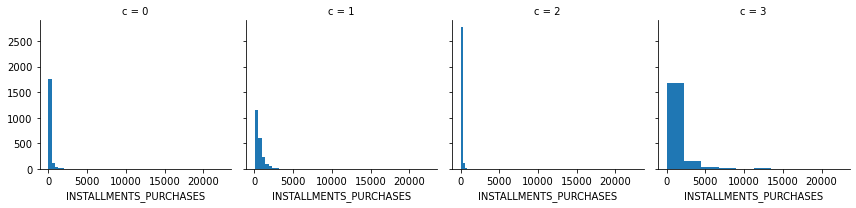

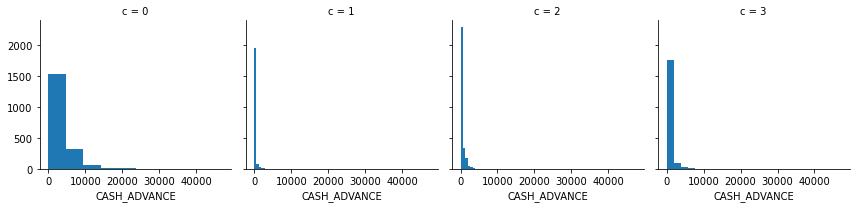

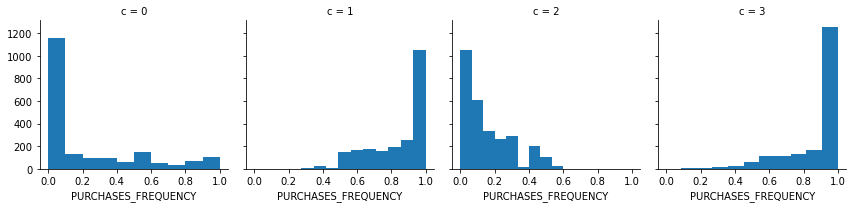

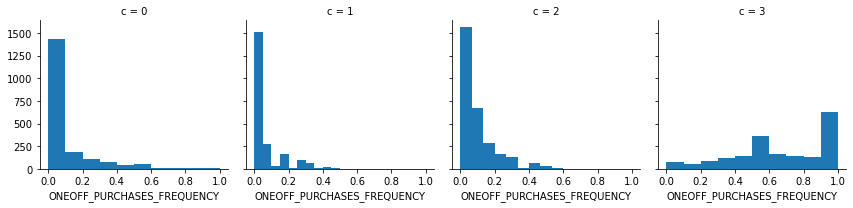

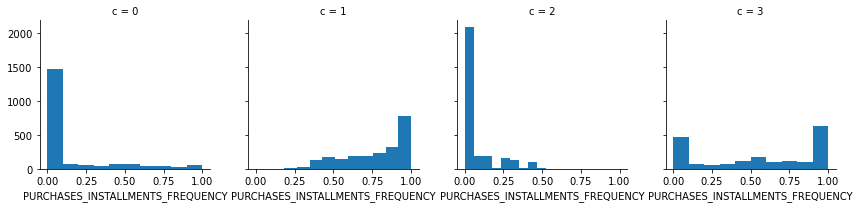

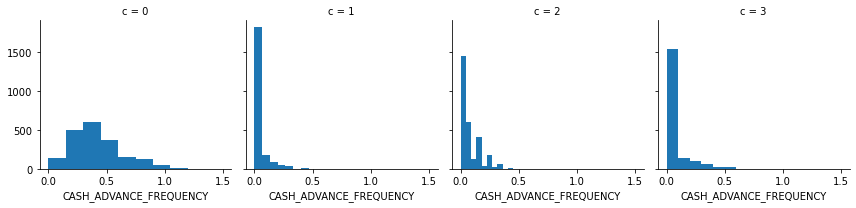

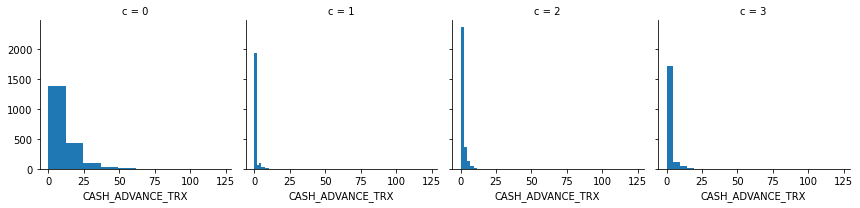

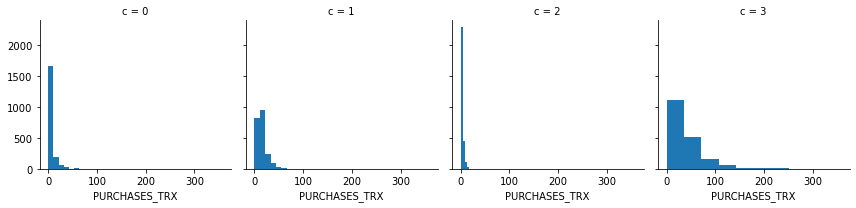

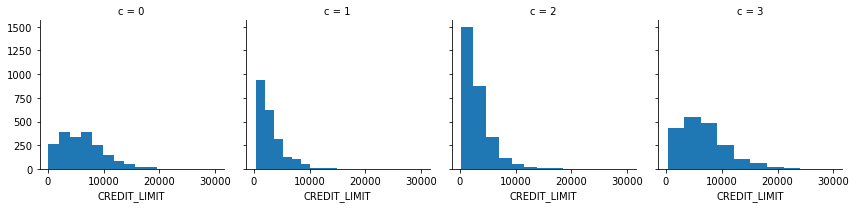

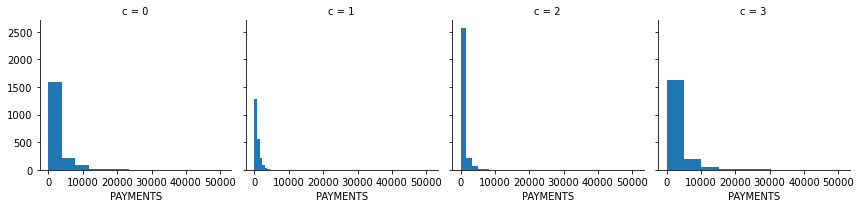

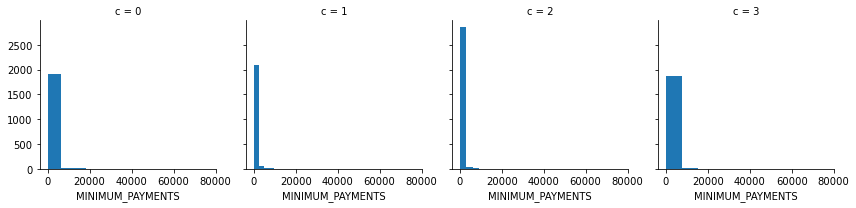

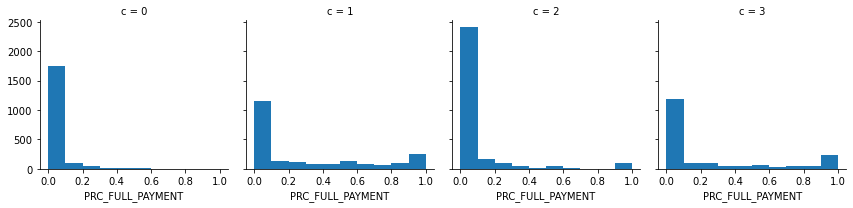

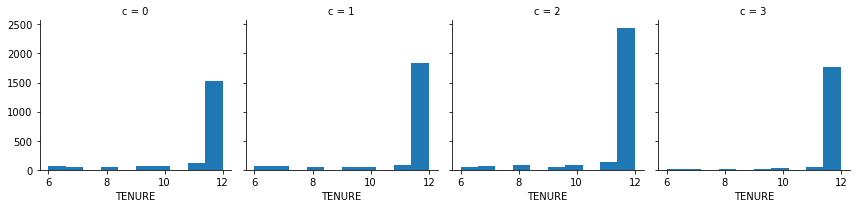

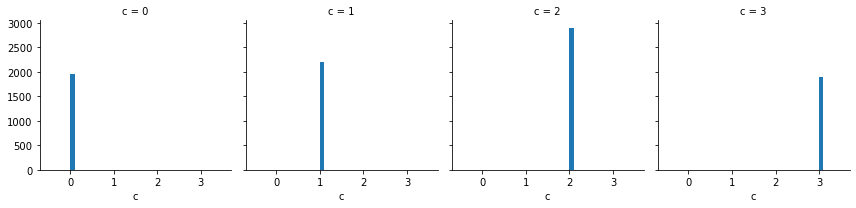

In [90]:
# Obtenemos las 68 gráficas: 17 filas por la cantidad de variables y 4 columnas por la cantidad de clusters
for col in df:
    grid= sns.FacetGrid(df, col='c')
    grid.map(plt.hist, col)

HomeWork => intentar analizar los datos y sacar tus propias conclusiones

Observando la variable BALANCE clusterizada podemos decir:
Muchos usuarios del c=1, y c=2 tienen un balance cercano a 0USD
En el c=0 esta un poco más distribuido la cantidad de BALANCE, hay pocas personas que tienen un balance de 15000USD y también hay menos personas que tienen un balance de 0USD

Observando la variable BALANCE_FREQUENCY clusterizada podemos decir:
Muchos usuarios del c=1 modifican el balance frecuentemente,
mientras que en el c=0 y c=3 hay personas que no lo modifican frecuentemente

Las conclusiones observadas son:
- C0 : Son las personas que hacen gran uso de su crédito, por ello su límite de crédito es alto, no suelen comprar con frecuencia, y procuran no obtener financiamientos para obtener bienes.
- C1 : Son las personas que no suelen utilizar con regularidad su tarjeta de crédito del banco que  estamos analizando.
- C2 : Son las personas que utilizan frecuentemente su tarjeta de crédito, tienen muy buen balance, hacen compras frecuentes y en gran volumen, por lo tanto, también cuentan con un límite de crédito alto e incluso pueden comprar cosas por adelantado.
- C3 : Son las personas que tienen malos hábitos financieros por que suelen usar mucho su tarjeta aun sin tener el balance que lo respalde, realizan múltiples compras financiadas.

Preguntas a explotar:

=> porque algunas personas no usan la tarjeta?, 
Es probable que las personas que aparentemente tienen una buena fuente de ingresos.. podemos ofrecerles otro producto... etc..